- Standardization Python Implementation
- Min Max Scaling


### Standardization (Z-Score Scaling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.DataFrame({'h':[150,160,170,180,190],
                  'w':[50,60,70,80,90]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [7]:
m=df.mean()
s=df.std()
print(s)

z=(df-m)/s
z.round(2)


h    15.811388
w    15.811388
dtype: float64


,h,w
0,-1.26,-1.26
1,-0.63,-0.63
2,0.00,0.00
3,0.63,0.63
4,1.26,1.26


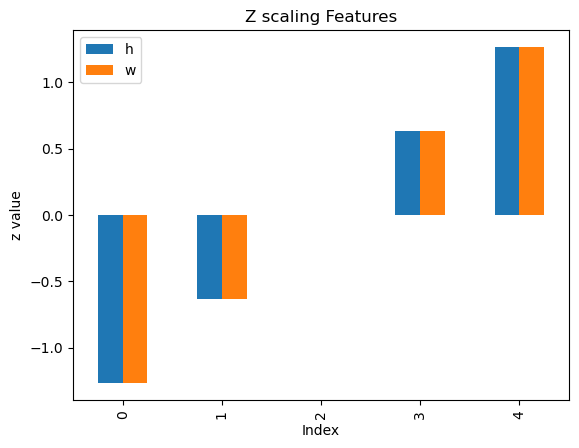

In [8]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index")
plt.ylabel("z value")
plt.show()